## Team Members Group 2:

- Ahmed Allam
- Naif Alfouzan
- Sarah  Aljudaibi

# Problem Statment

Build a model to solve a problem of predicting house prices with giving the minimum RMSE score prediction on prices based on diffrent features. This program will help the house sellers and also the buyers to get the model predict the located house price based on it current features



# Introduction

The notebook is to create an accurate prediction model for house pricing  based on historical data that has +80 features.

The features are classified to numerical and categorical data. Our task is to study the correlation between each feature, clean the data by replacing nulls, dropping unnecessary features, and converting data type for some features. After cleaning part, we will standarize the distribution of feature values to have scaled model. Then we will select features of our model and apply different regression approaches to decide what is the most accurate model.

The consequential steps to have our model are as the following:
 1. Import libraries and datasets
 2. Exploratory Data Analysis<br>
      2.1 Data Overview<br>
      2.2 Statistics<br>
      2.3 Correlation analysis<br>
 3. Data Cleaning<br>
      3.1 Training dataframe cleaning<br>
      3.2 Finding the outliers<br>
      3.3 Teasting dataframe cleaning
 4. Get Dummies<br>
      4.1 find categorial features
 5. Select Features
 6. Apply different Prediction models<br>
    6.1 LassoCV model with standarize<br>
    6.2 RidgeCV model<br>
        6.2.1 RidgeCV modelwithout standarize<br>
        6.2.2 RidgeCV model with standarize<br>
    6.3 Bagging regresser<br>
        6.3.1 Bagging regrosser without standarize<br>
        6.3.2 Bagging regrosser with standarize<br>
    6.4 Random forest regresser<br>
        6.4.1 Random forest regresser without standarize<br>
        6.4.2 Random forest regresser with standarize<br>
    6.5 Decision Tree regressor with standarize<br>
        6.5.1 Decision Tree regressor with standarize<br>
        6.5.2 Decision Tree regressor without standarize<br>
    6.6 models with Feature selection<br>  
 7. Sumbission 

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LassoCV,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict,train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm, skew 
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")


# 1. Import Training and Testing Dataset

In [2]:
house_prices_train=pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
house_prices_test=pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
sampl_sub=pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

# 2. Exploratory Data Analysis

## 2.1 Data Overview

In [3]:
house_prices_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_prices_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
house_prices_train.shape

(1460, 81)

In [6]:
house_prices_test.shape

(1459, 80)

In [7]:
sampl_sub.shape

(1459, 2)

In [8]:
house_prices_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 2.2 Statistics

In [9]:
house_prices_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
#check the column type 
house_prices_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [11]:
#change the column type to it's appropriate type if possible
house_prices_train=house_prices_train.apply(pd.to_numeric, errors='ignore')


In [12]:
#check the numbers of uniques values in all columns 
house_prices_train.nunique(axis=0)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [13]:
#ckeck if there is a null in the train dataframe

print("is there missing samples in training set:",house_prices_train.isnull().values.any())

# get all the columns with a missing values
house_prices_train.columns[house_prices_train.isnull().any()]

is there missing samples in training set: True


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [14]:
#ckeck if there is a null in the test dataframe


print("is there missing samples in test set:",house_prices_test.isnull().values.any())

# get all the columns with a missing values
house_prices_train.columns[house_prices_train.isnull().any()]

is there missing samples in test set: True


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [15]:
# Check the statistical measures of the predicted target (SalePrice)
house_prices_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876


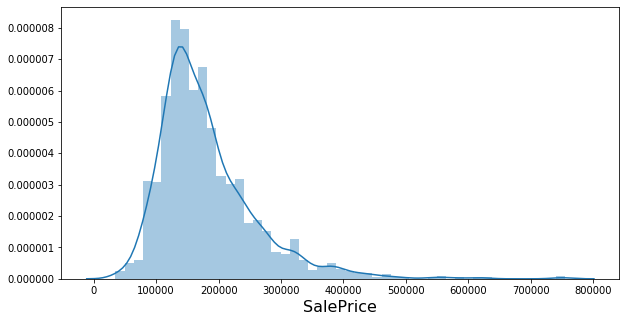

In [16]:
#check SalePrice distribuation
plt.figure(figsize=(10,5));
plt.xlabel('xlabel', fontsize=16);
plt.rc('xtick', labelsize=14); 
plt.rc('ytick', labelsize=14); 


sns.distplot(house_prices_train['SalePrice']);
print("Skewness: %f" % house_prices_train['SalePrice'].skew())

The SalePrices is Positive skew this is mean there are outliers greater than the mean.

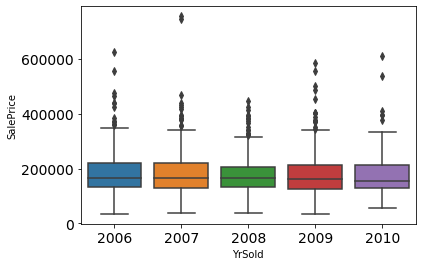

In [17]:
# YrSold has the lowest correlation with SalePrice
sns.boxplot(x="YrSold",y="SalePrice",data=house_prices_train);


From the above boxplot, it is noticed there is almost zero correlation between Year of sales and sales Price, so it shouldn't be considered in our model

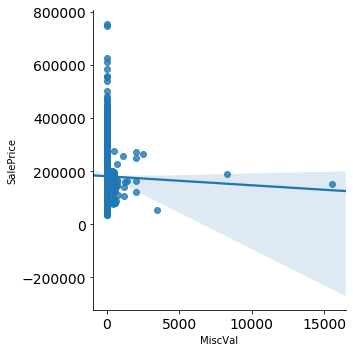

In [18]:
# MiscVal has the second lowest correlation with SalePrice
sns.lmplot (x="MiscVal",y="SalePrice",data=house_prices_train);


From the above scatter plot, it is noticed there is almost zero correlation between Value of miscellaneous feature and sales Price, so it shouldn't be considered in our model

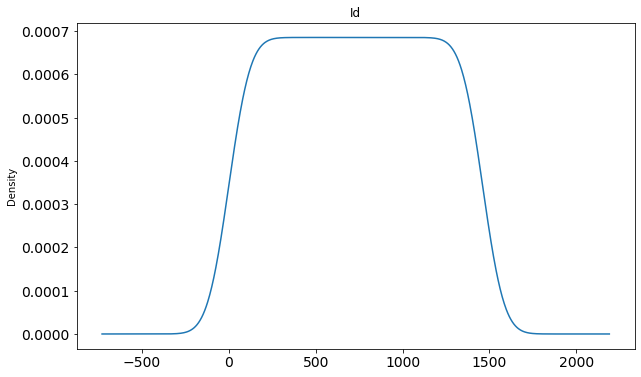


Z-score for Id : 
 [-1.73086488 -1.7284922  -1.72611953 ...  1.72611953  1.7284922
  1.73086488]
mean= 730.5
skew= 0.0


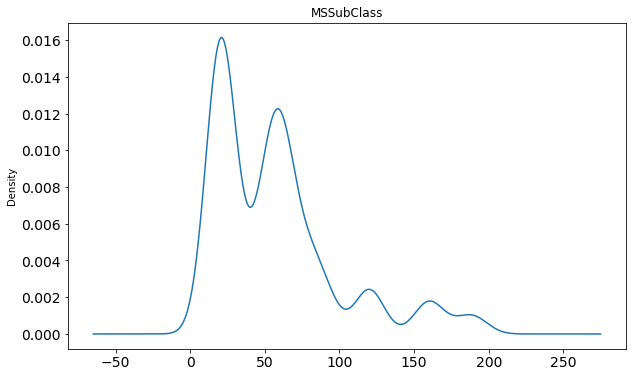


Z-score for MSSubClass : 
 [ 0.07337496 -0.87256276  0.07337496 ...  0.30985939 -0.87256276
 -0.87256276]
mean= 56.897260273972606
skew= 1.4076567471495591


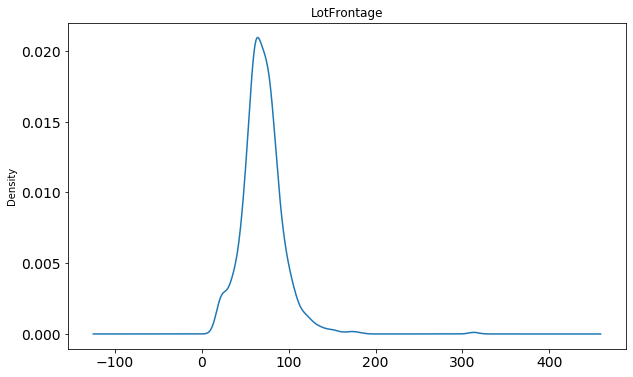


Z-score for LotFrontage : 
 [nan nan nan ... nan nan nan]
mean= 70.04995836802665
skew= 2.163569142324884


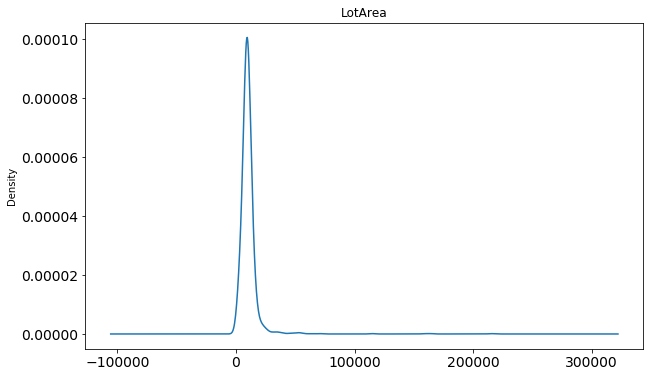


Z-score for LotArea : 
 [-0.20714171 -0.09188637  0.07347998 ... -0.14781027 -0.08016039
 -0.05811155]
mean= 10516.828082191782
skew= 12.207687851233496


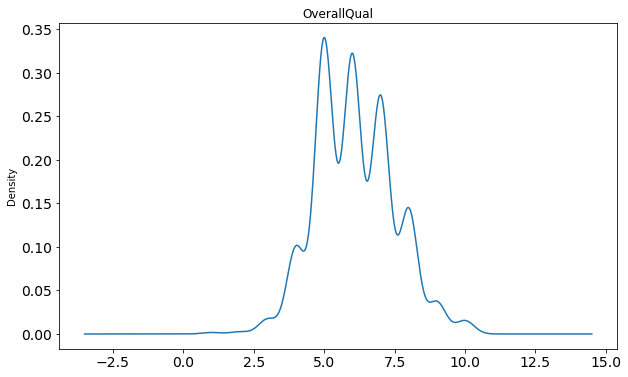


Z-score for OverallQual : 
 [ 0.65147924 -0.07183611  0.65147924 ...  0.65147924 -0.79515147
 -0.79515147]
mean= 6.0993150684931505
skew= 0.2169439277628693


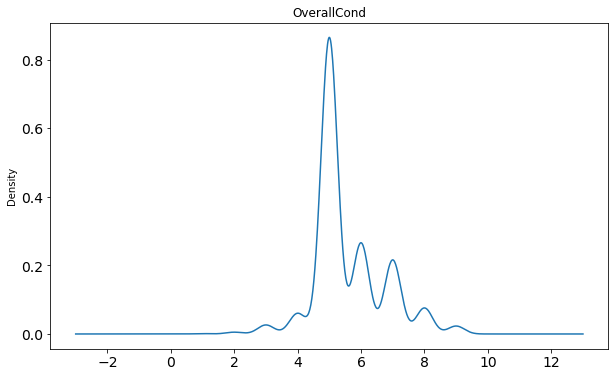


Z-score for OverallCond : 
 [-0.51719981  2.17962776 -0.51719981 ...  3.07857028  0.38174271
  0.38174271]
mean= 5.575342465753424
skew= 0.6930674724842182


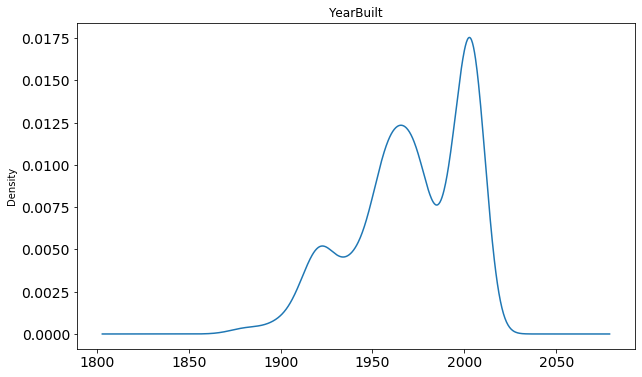


Z-score for YearBuilt : 
 [ 1.05099379  0.15673371  0.9847523  ... -1.00249232 -0.70440562
 -0.20759447]
mean= 1971.267808219178
skew= -0.613461172488183


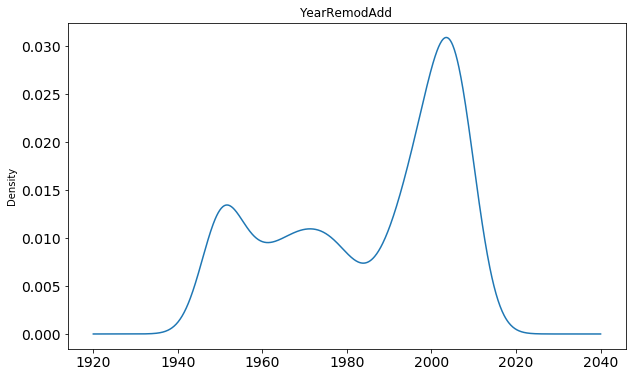


Z-score for YearRemodAdd : 
 [ 0.87866809 -0.42957697  0.83021457 ...  1.02402865  0.53949344
 -0.96256569]
mean= 1984.8657534246574
skew= -0.5035620027004709


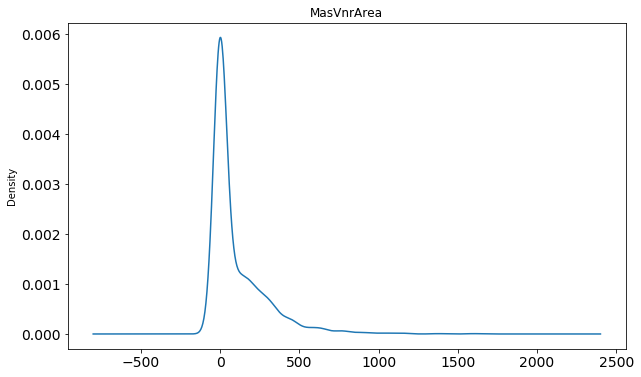


Z-score for MasVnrArea : 
 [nan nan nan ... nan nan nan]
mean= 103.68526170798899
skew= 2.669084210182863


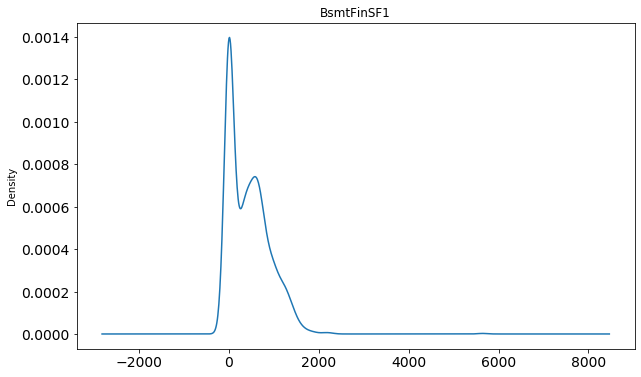


Z-score for BsmtFinSF1 : 
 [ 0.57542484  1.17199212  0.09290718 ... -0.36987111 -0.86554834
  0.84738933]
mean= 443.6397260273973
skew= 1.685503071910789


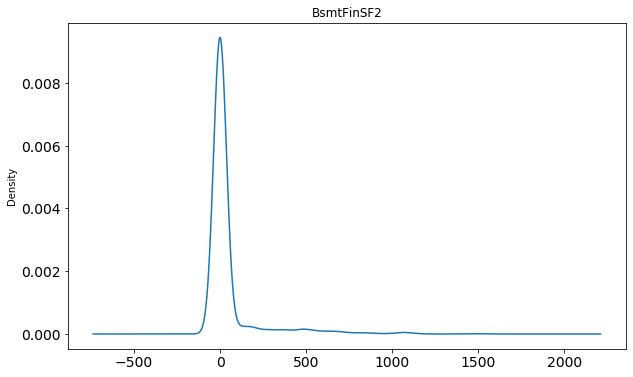


Z-score for BsmtFinSF2 : 
 [-0.28865283 -0.28865283 -0.28865283 ... -0.28865283  6.09218785
  1.50964046]
mean= 46.54931506849315
skew= 4.255261108933303


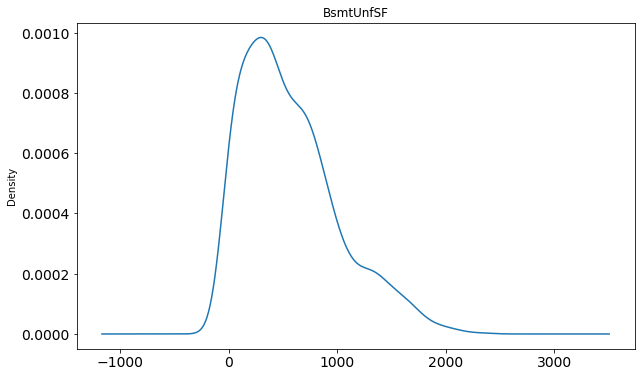


Z-score for BsmtUnfSF : 
 [-0.94459061 -0.64122799 -0.30164298 ...  0.70126476 -1.28417562
 -0.97628521]
mean= 567.2404109589041
skew= 0.9202684528039037


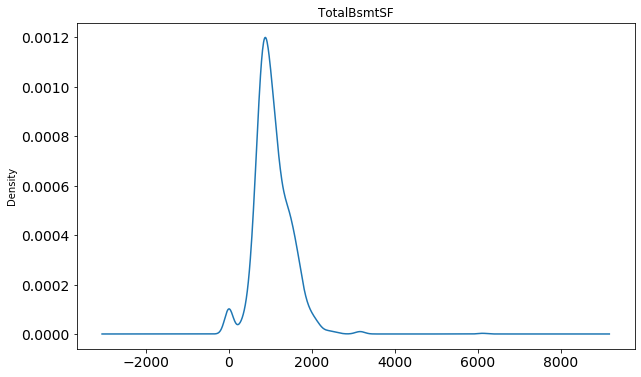


Z-score for TotalBsmtSF : 
 [-0.45930254  0.46646492 -0.31336875 ...  0.21564122  0.04690528
  0.45278362]
mean= 1057.4294520547944
skew= 1.5242545490627664


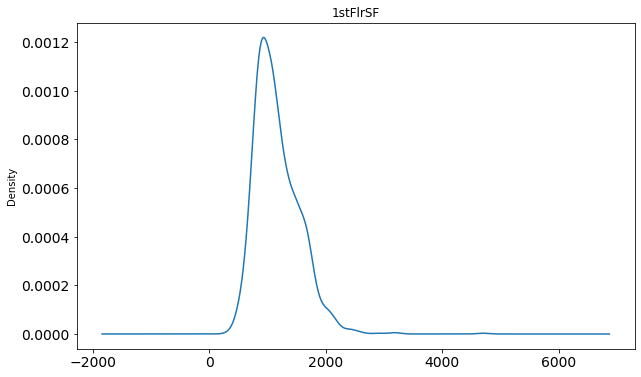


Z-score for 1stFlrSF : 
 [-0.79343379  0.25714043 -0.62782603 ...  0.06565646 -0.21898188
  0.2416147 ]
mean= 1162.626712328767
skew= 1.3767566220336365


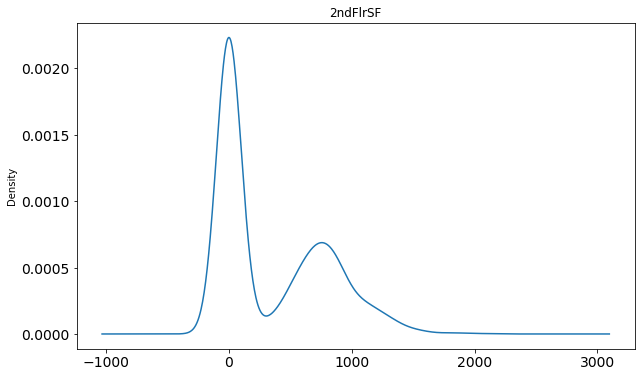


Z-score for 2ndFlrSF : 
 [ 1.16185159 -0.79516323  1.18935062 ...  1.84474434 -0.79516323
 -0.79516323]
mean= 346.99246575342465
skew= 0.8130298163023265


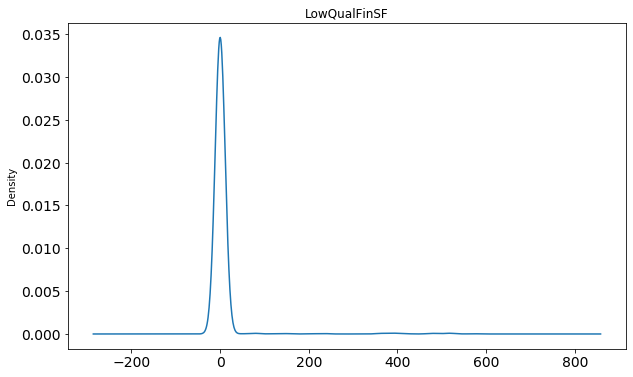


Z-score for LowQualFinSF : 
 [-0.12024172 -0.12024172 -0.12024172 ... -0.12024172 -0.12024172
 -0.12024172]
mean= 5.844520547945206
skew= 9.011341288465387


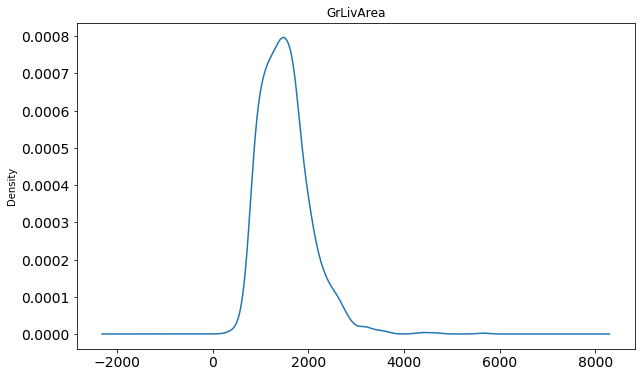


Z-score for GrLivArea : 
 [ 0.37033344 -0.48251191  0.51501256 ...  1.56964722 -0.83278768
 -0.49393395]
mean= 1515.463698630137
skew= 1.3665603560164552


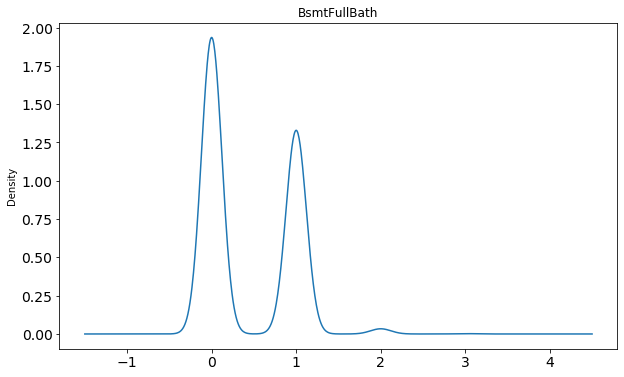


Z-score for BsmtFullBath : 
 [ 1.10781015 -0.81996437  1.10781015 ... -0.81996437  1.10781015
  1.10781015]
mean= 0.42534246575342466
skew= 0.596066609663168


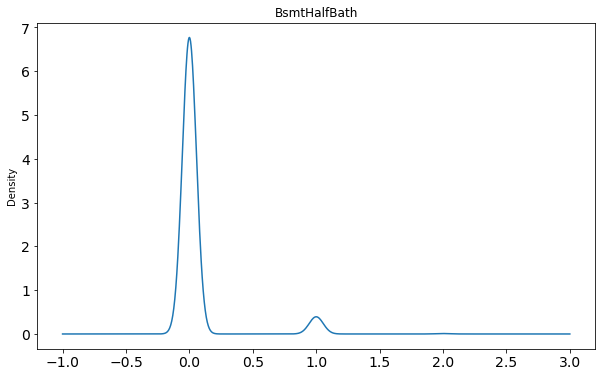


Z-score for BsmtHalfBath : 
 [-0.24106104  3.94880935 -0.24106104 ... -0.24106104 -0.24106104
 -0.24106104]
mean= 0.057534246575342465
skew= 4.103402697955168


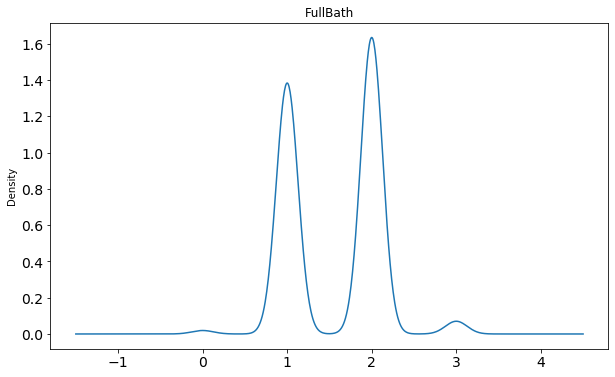


Z-score for FullBath : 
 [ 0.78974052  0.78974052  0.78974052 ...  0.78974052 -1.02604084
 -1.02604084]
mean= 1.5650684931506849
skew= 0.036561558402727165


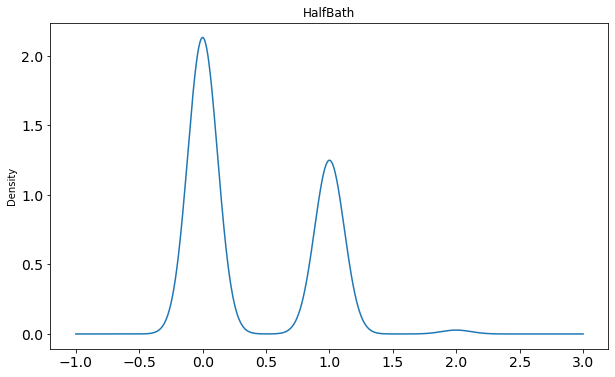


Z-score for HalfBath : 
 [ 1.22758538 -0.76162067  1.22758538 ... -0.76162067 -0.76162067
  1.22758538]
mean= 0.38287671232876713
skew= 0.675897448233722


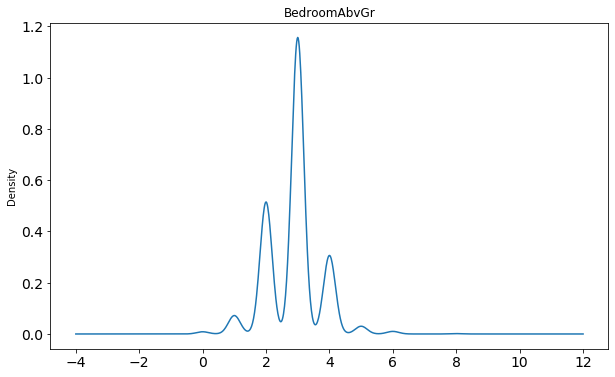


Z-score for BedroomAbvGr : 
 [ 0.16377912  0.16377912  0.16377912 ...  1.39002276 -1.06246453
  0.16377912]
mean= 2.8664383561643834
skew= 0.21179009627507137


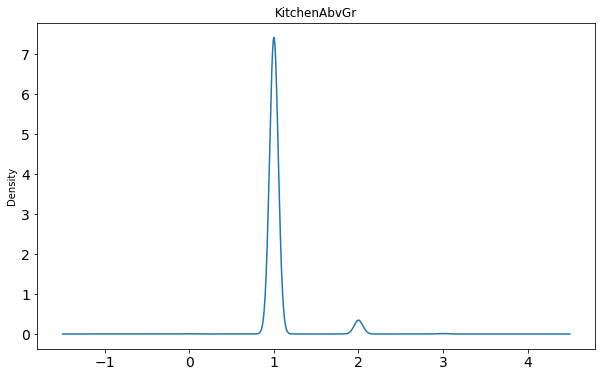


Z-score for KitchenAbvGr : 
 [-0.21145358 -0.21145358 -0.21145358 ... -0.21145358 -0.21145358
 -0.21145358]
mean= 1.0465753424657533
skew= 4.488396777072859


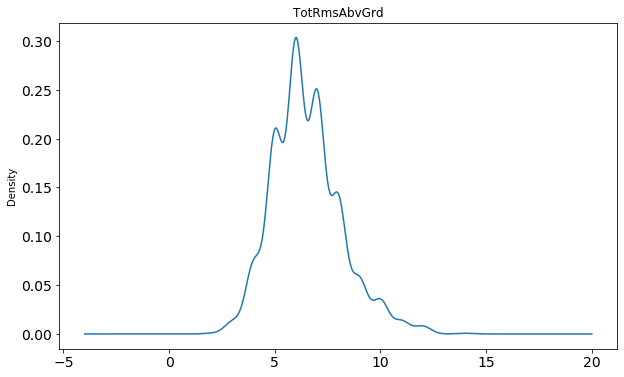


Z-score for TotRmsAbvGrd : 
 [ 0.91220977 -0.31868327 -0.31868327 ...  1.52765629 -0.93412978
 -0.31868327]
mean= 6.517808219178082
skew= 0.6763408364355531


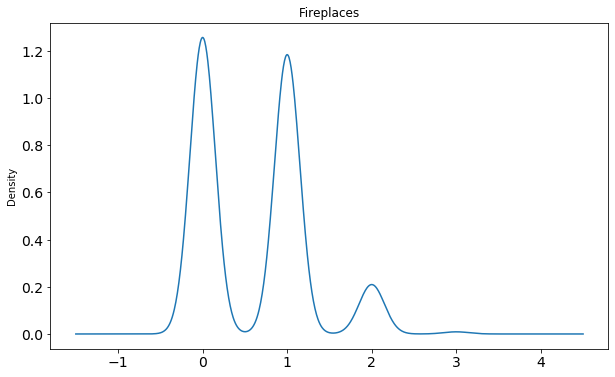


Z-score for Fireplaces : 
 [-0.95122649  0.60049493  0.60049493 ...  2.15221636 -0.95122649
 -0.95122649]
mean= 0.613013698630137
skew= 0.6495651830548841


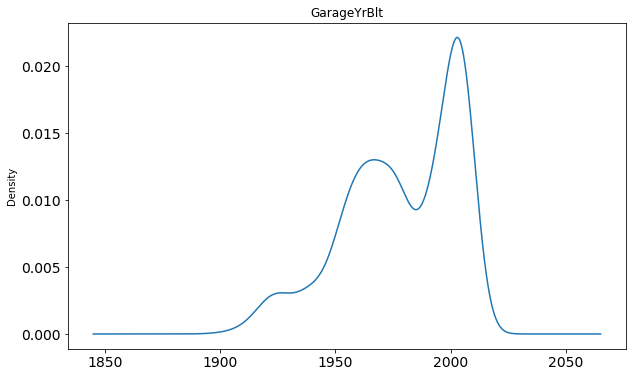


Z-score for GarageYrBlt : 
 [nan nan nan ... nan nan nan]
mean= 1978.5061638868744
skew= -0.6494146238714679


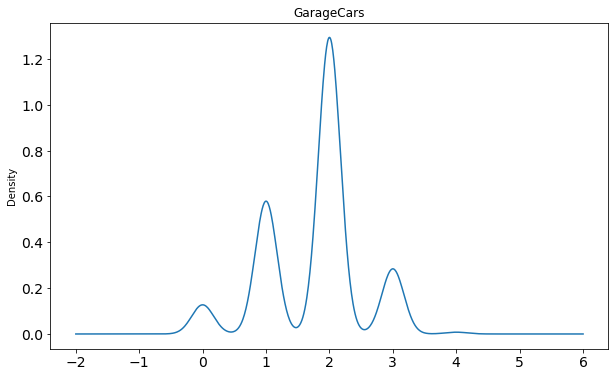


Z-score for GarageCars : 
 [ 0.31172464  0.31172464  0.31172464 ... -1.02685765 -1.02685765
 -1.02685765]
mean= 1.7671232876712328
skew= -0.3425489297486655


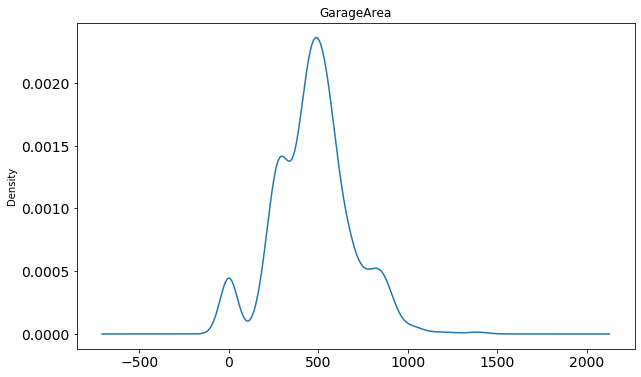


Z-score for GarageArea : 
 [ 0.35100032 -0.06073101  0.63172623 ... -1.03391416 -1.09005935
 -0.9216238 ]
mean= 472.9801369863014
skew= 0.17998090674623907


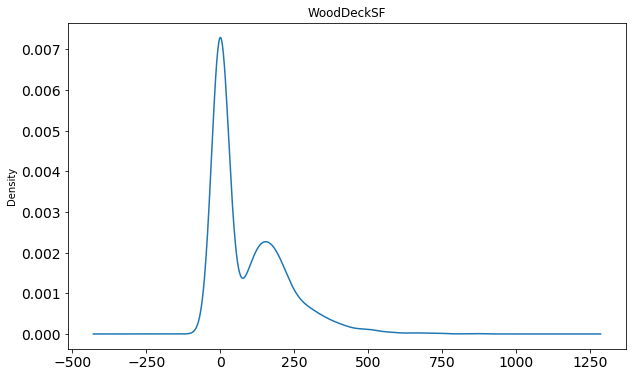


Z-score for WoodDeckSF : 
 [-0.75217584  1.62619479 -0.75217584 ... -0.75217584  2.16891024
  5.12192075]
mean= 94.2445205479452
skew= 1.5413757571931312


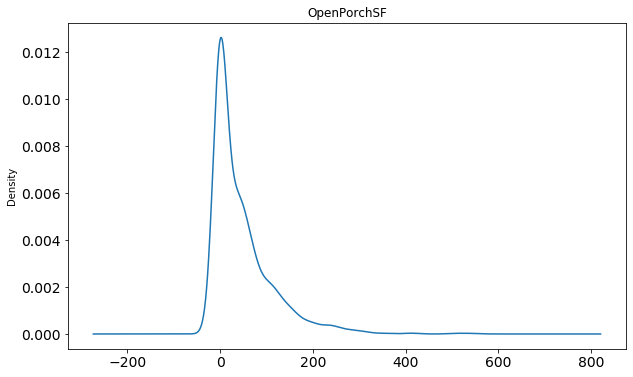


Z-score for OpenPorchSF : 
 [ 0.21650316 -0.70448325 -0.07036146 ...  0.20140502 -0.70448325
  0.32219013]
mean= 46.66027397260274
skew= 2.3643417403694404


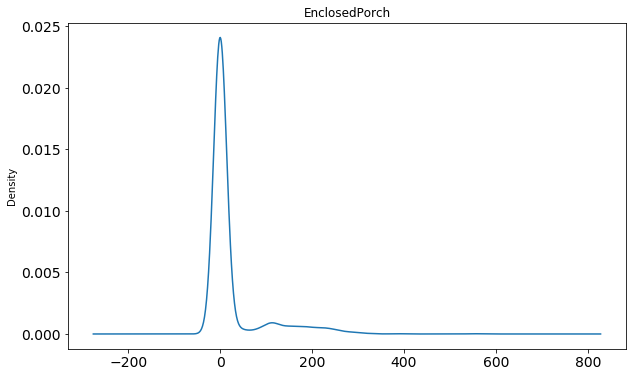


Z-score for EnclosedPorch : 
 [-0.3593249  -0.3593249  -0.3593249  ... -0.3593249   1.47378925
 -0.3593249 ]
mean= 21.954109589041096
skew= 3.08987190371177


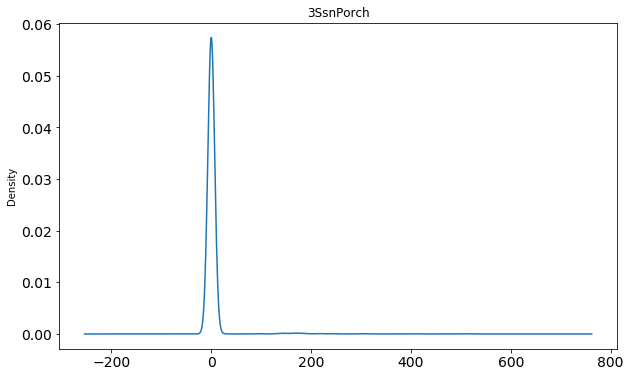


Z-score for 3SsnPorch : 
 [-0.11633929 -0.11633929 -0.11633929 ... -0.11633929 -0.11633929
 -0.11633929]
mean= 3.4095890410958902
skew= 10.304342032693112


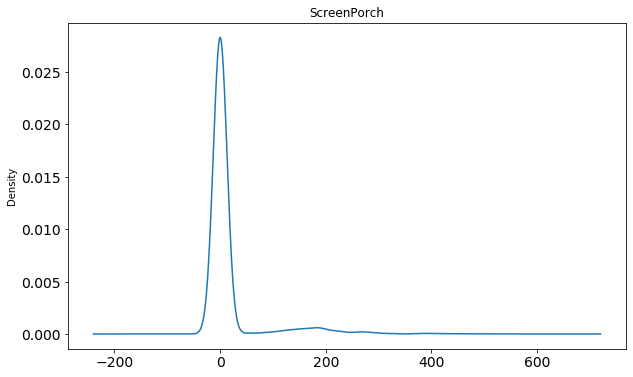


Z-score for ScreenPorch : 
 [-0.27020835 -0.27020835 -0.27020835 ... -0.27020835 -0.27020835
 -0.27020835]
mean= 15.060958904109588
skew= 4.122213743143115


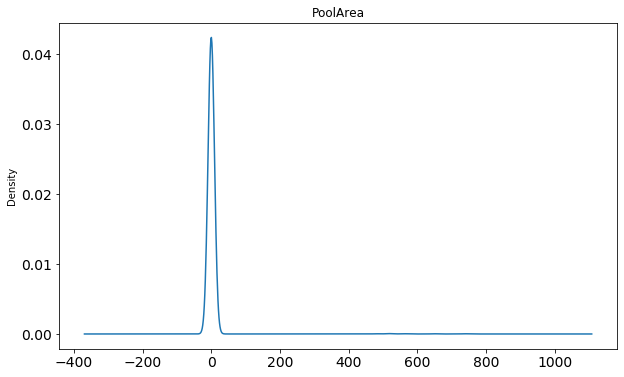


Z-score for PoolArea : 
 [-0.06869175 -0.06869175 -0.06869175 ... -0.06869175 -0.06869175
 -0.06869175]
mean= 2.758904109589041
skew= 14.828373640750588


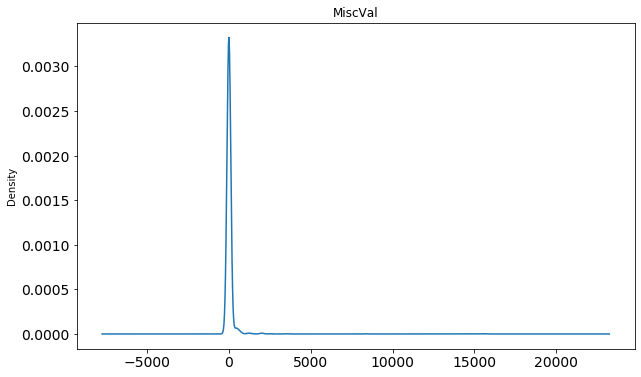


Z-score for MiscVal : 
 [-0.08768781 -0.08768781 -0.08768781 ...  4.95311151 -0.08768781
 -0.08768781]
mean= 43.489041095890414
skew= 24.476794188821916


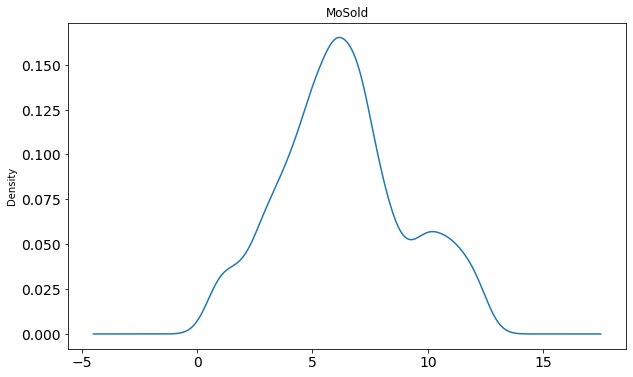


Z-score for MoSold : 
 [-1.5991111  -0.48911005  0.99089135 ... -0.48911005 -0.8591104
 -0.1191097 ]
mean= 6.321917808219178
skew= 0.21205298505146022


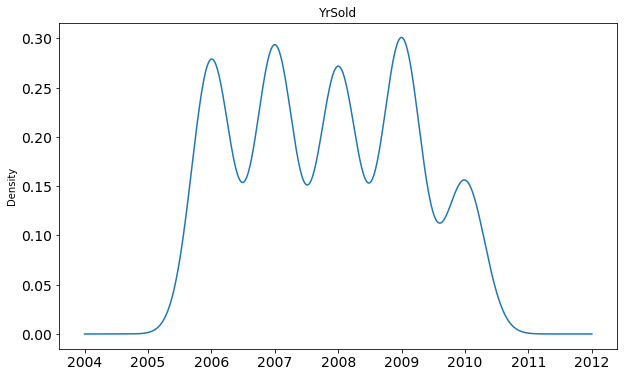


Z-score for YrSold : 
 [ 0.13877749 -0.61443862  0.13877749 ...  1.64520971  1.64520971
  0.13877749]
mean= 2007.8157534246575
skew= 0.09626851386568028


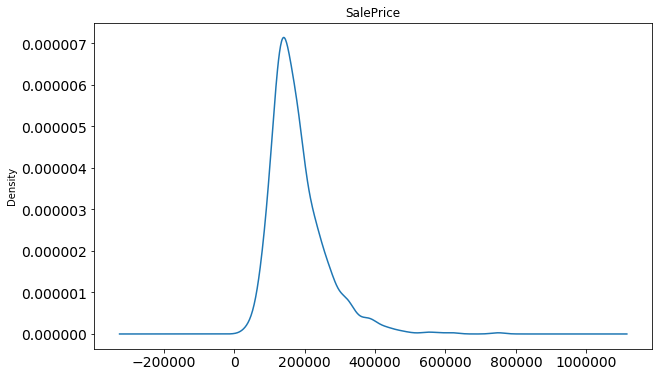


Z-score for SalePrice : 
 [ 0.34727322  0.00728832  0.53615372 ...  1.07761115 -0.48852299
 -0.42084081]
mean= 180921.19589041095
skew= 1.8828757597682129


In [19]:
# observe the distributation for each column
#get the z score for each column and plot it
numerical_cols = house_prices_train.dtypes[house_prices_train.dtypes !="object"].index
for i in numerical_cols:
    ax = house_prices_train[i].plot(x='ZScore', y='FreqDist', kind='kde', figsize=(10, 6),title=i)
    plt.show()
    print ("\nZ-score for",i,":","\n", stats.zscore(house_prices_train[i]))
    print("mean=",house_prices_train[i].mean())
    print("skew=",house_prices_train[i].skew())

From the plot we notice most columns have a positive skew and z score above the mean


## 2.3 Correlation Analysis

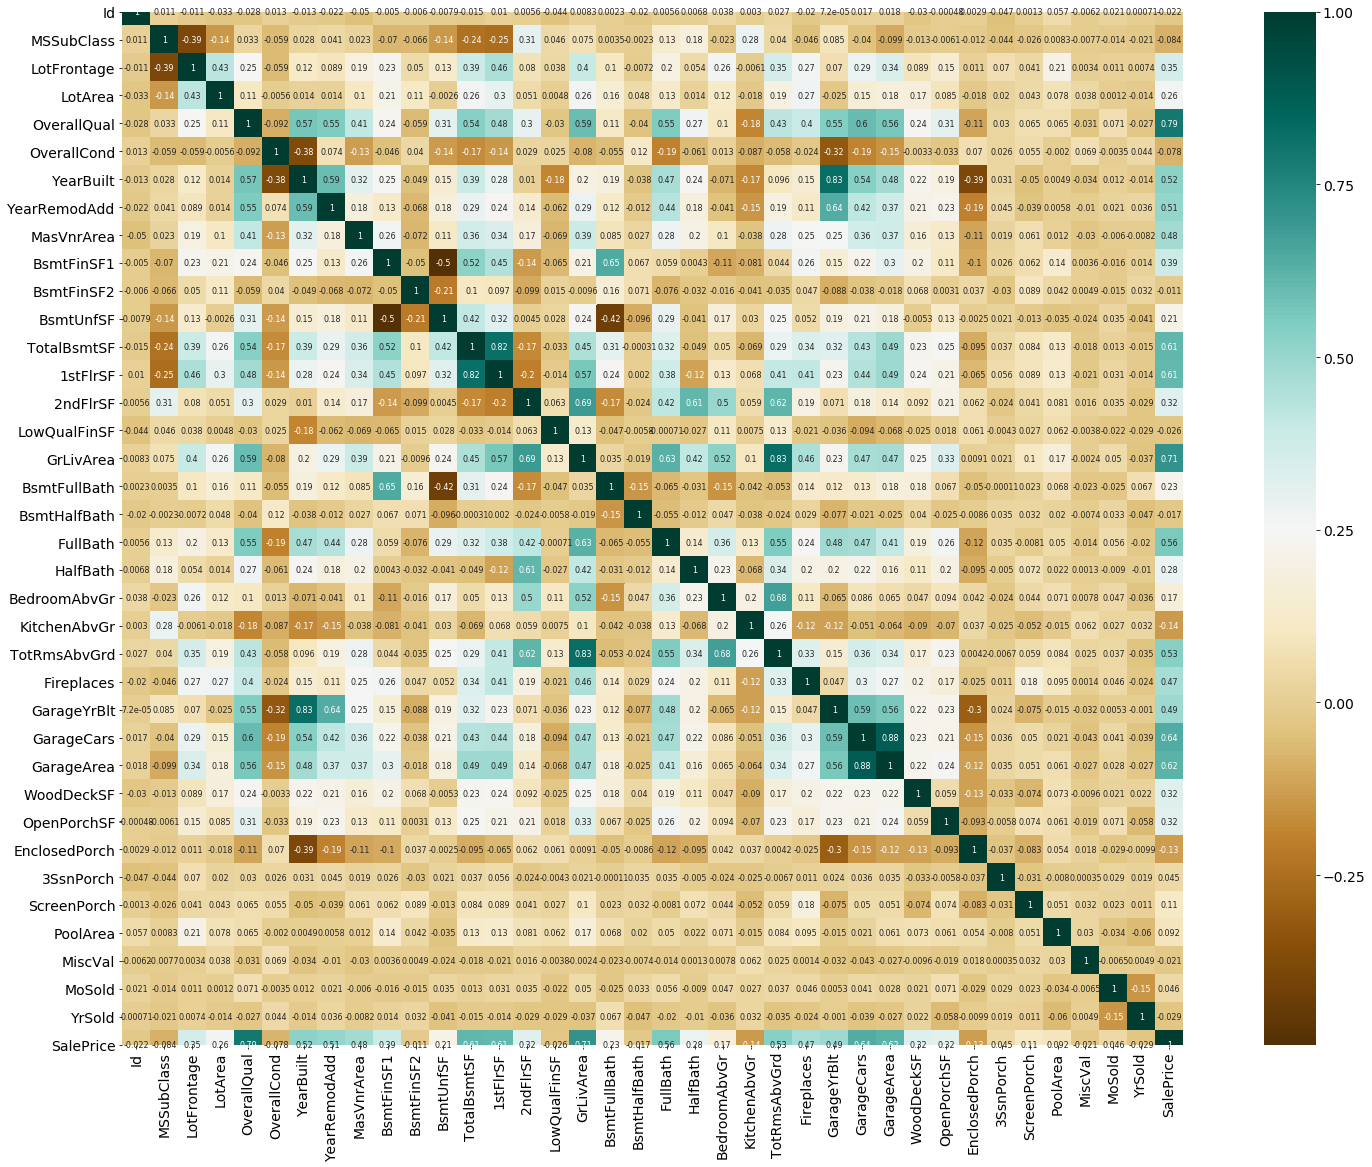

In [17]:
# Correlation of all numeric features in the training dataset
cor_train=house_prices_train.corr()
plt.figure(figsize=(29,19))
sns.heatmap(cor_train,annot=True,cmap="BrBG",square=True, annot_kws={'size': 8})

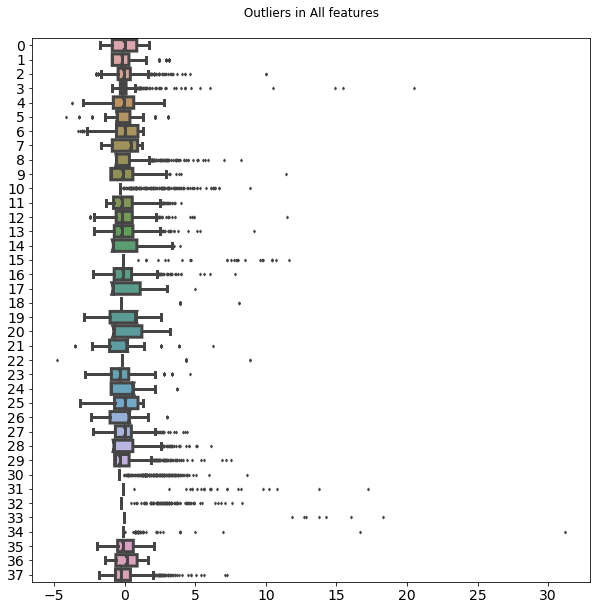

In [18]:
#box plot to determine the outliers in all the features
#get only numerical columns
stand_df_houses=house_prices_train._get_numeric_data()

#scale all columns
stand_df_houses=StandardScaler().fit_transform(stand_df_houses)

#plot to see the outliers
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

sns.boxplot(data=stand_df_houses, orient='h', fliersize=2, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title(' Outliers in All features \n')
plt.show()

##### From the plot above we can see there are a lot of outliers, but we can't drop all of them because it will affect the results of the models

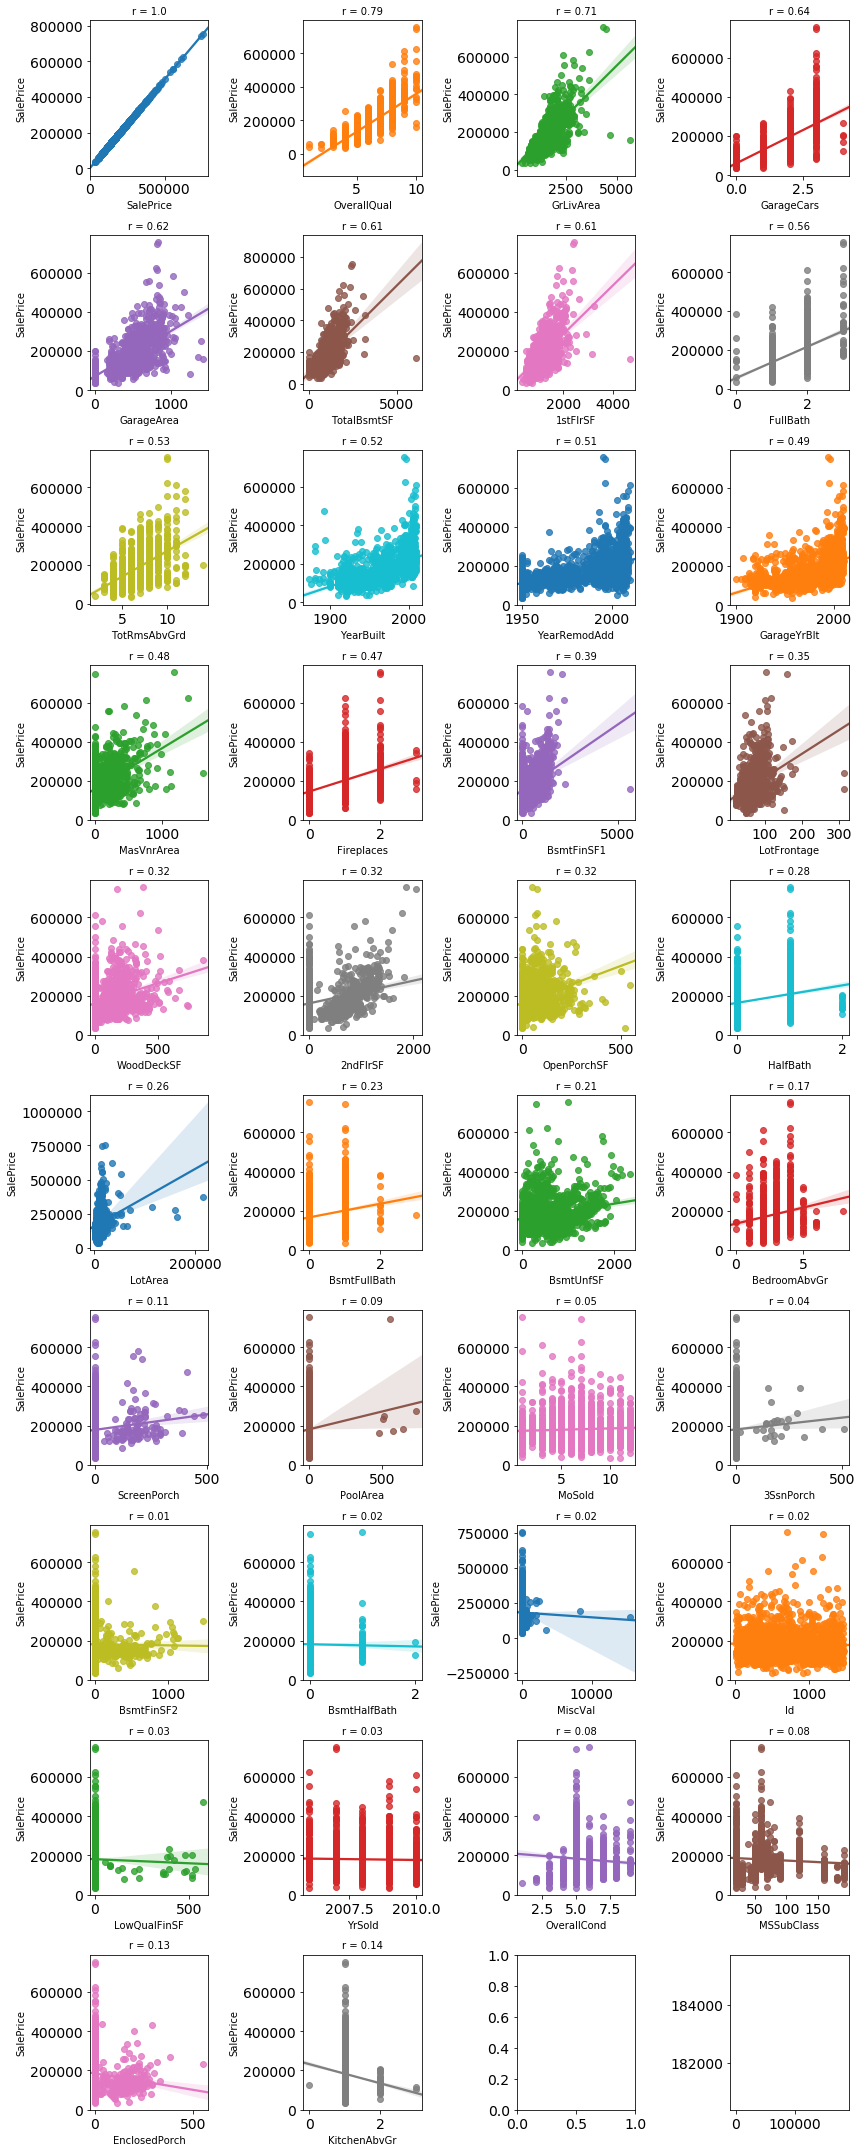

In [19]:
# Plotting Correlation of all numeric features in the training dataset

# Plot Outline
rows = 10
cols = 4
sorted_cols = cor_train.nlargest(len(cor_train), 'SalePrice')['SalePrice'].index #to sort columns from highest correlation with SalePrice
#Number_numerical = house_prices_train.dtypes[house_prices_train.dtypes !="object"].index
numerical_cols= len(sorted_cols)
fig, axs = plt.subplots(rows, cols, figsize=(cols*3,rows*3))
# Loop Definition
for r in range(0,rows):
    for c in range(0,cols):
        # Numerical Columns Condition
        i = r*cols+c
        if i < numerical_cols:
            sns.regplot(house_prices_train[sorted_cols[i]], house_prices_train["SalePrice"], ax = axs[r][c])
            # Correlation Definition
            correlation = house_prices_train[sorted_cols[i]].corr(house_prices_train["SalePrice"])
            corr_abs = round(abs(correlation),2)
            
            
            
            # Adjusting the plot appearance
            title = "r = " + "{}".format(corr_abs)
            axs[r][c].set_title(title,fontsize=10)
plt.tight_layout()
plt.show()

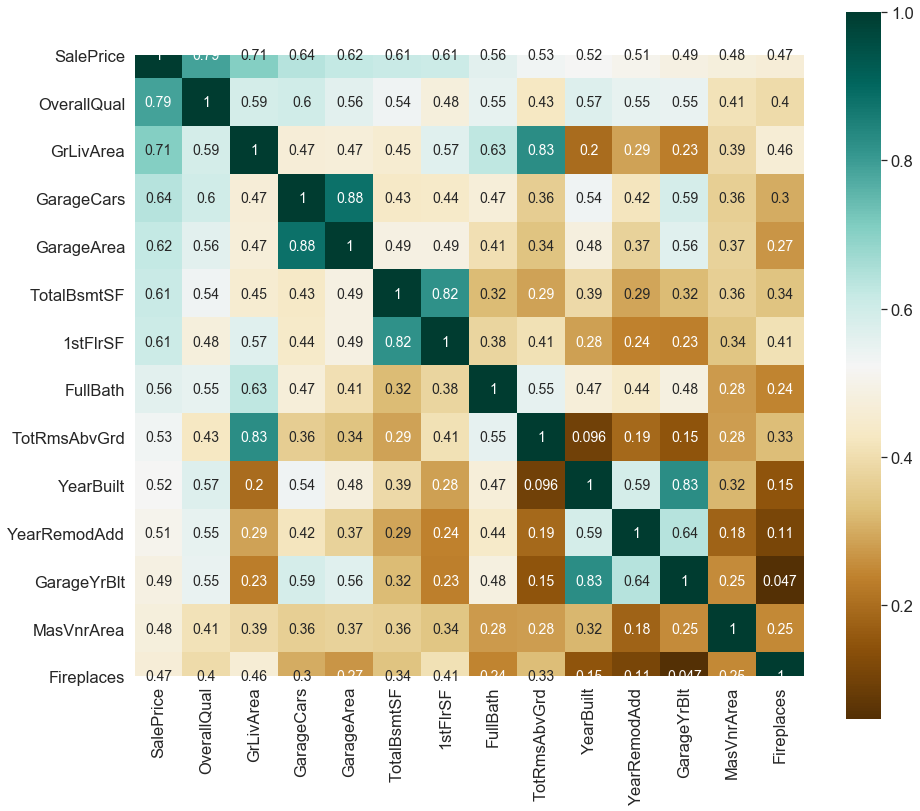

In [20]:
# Top Numerical Correlations with SalePrice

# get the only columns that have higher correlation than the threshold 
#select strong positive using threshold more than.4

threshold=0.4 
cor_train=house_prices_train.corr()
high_corre = cor_train.index[abs(cor_train["SalePrice"])>threshold]

#to sort columns from highest correlation with SalePrice
sorted_cols = cor_train.nlargest(len(high_corre),
'SalePrice')['SalePrice'].index 

plt.figure(figsize=(15,13))
sns.set(font_scale=1.5)

#plot heatmap with only the top features
nr_corr_matrix = sns.heatmap(house_prices_train[sorted_cols].corr(),
annot=True,cmap="BrBG",square=True, annot_kws={'size':14})


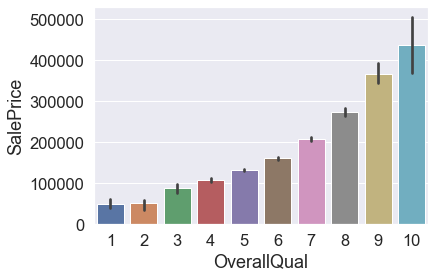

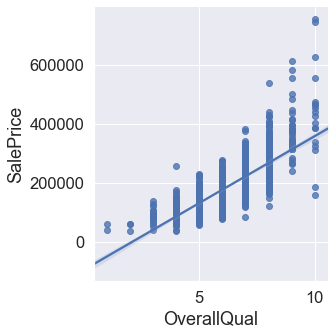

In [21]:
# Overallquality column has the highest correlation with the SalePrice
plt.subplot(1,1,1)

sns.barplot(house_prices_train.OverallQual,house_prices_train.SalePrice)
sns.lmplot (x="OverallQual",y="SalePrice",data=house_prices_train);


Each OverallQual repreasent Rate of the material and finish of the house. From the plot above, If the house gets a high rate the price will increase

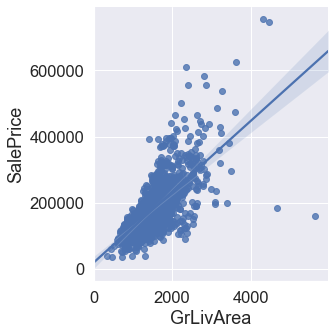

In [22]:
# GrLivArea column has the second high correlation with SalePrice
sns.lmplot (x="GrLivArea",y="SalePrice",data=house_prices_train)
plt.show()

The GrLiveArea is the size of the living area in square feet. the bigger the living area the higher sales prices



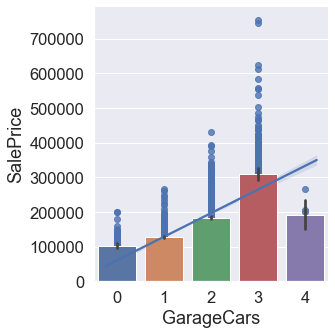

In [23]:
# GarageCars column has the third correlation with SalePrice
sns.lmplot (x="GarageCars",y="SalePrice",data=house_prices_train)
sns.barplot(house_prices_train.GarageCars,house_prices_train.SalePrice)
plt.show()

Category with garage car size 4 got a less sales prices than the other categories. further investigation will be done in the next section

# 3. Data Cleaning

### 3.1 Training Dataframe

In [24]:
# check the precentage of the nan values in all columns before cleaning
house_prices_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Some columns in both dataframes contain categorical values. For some of these categories there is a category called NA (it doesn't mean nulls value) so we will change it through the function below

We will define function to replace all the np.nan (which are another type of categoricals but enter it as Na) from specific columns, to more meaningful value or string


In [88]:
#function to replace np.nan with string'None' 
#takes columns list name and the datafrme name
def replace_none(column_name_list,dataframe):
    
    for i in column_name_list:
        dataframe[i].replace(np.nan,'None',inplace=True)
    return dataframe



#name of column will we change
list_column=['Alley','MiscFeature','PoolQC','BsmtQual','BsmtCond','BsmtExposure',
             'BsmtFinType1','BsmtFinType2','GarageType','GarageFinish',
              'GarageQual','GarageCond','PoolQC','Fence','FireplaceQu']
    
replace_none(list_column,house_prices_train)

#check on one of the column
house_prices_train.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'None', 'LwQ'], dtype=object)

In [89]:
house_prices_train.shape

(1460, 81)

##### line of code to help get the column index for both train and test dataframe
column_index=np.argmax(np.array(DataframeName.columns=='columnName'))


In [90]:
#numerical columns index to replace each missing data with mode/most_frequent

column_index_train=[3,25,26,6,74,72,30,31,32,33,35,42,58,60,63,64,72,73,57]


In [91]:
from sklearn.impute import SimpleImputer
#replace np.nan in all columns with most frequent value
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imr = imr.fit(house_prices_train.iloc[:,column_index_train])

house_prices_train.iloc[:,column_index_train] = imr.transform(house_prices_train.iloc[:,column_index_train])

In [92]:
#see the relation between both years
house_prices_train[['GarageYrBlt','YearBuilt']].head()

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000


 From observation we can see that most of the garages are built in the same years of the houses

so we will replace the nan values in the garage year built to the value of the house year built in the same row

In [93]:
#replace each nan values in garage year with the year of the building in the same row

house_prices_train['GarageYrBlt'] = house_prices_train.apply(
lambda row: row['YearBuilt'] if np.isnan(row['GarageYrBlt']) else row['GarageYrBlt'],axis=1)


In [94]:
# check the precentage of the nan values in all columns after cleaning

houses_missing_value = house_prices_train.isnull().sum().sort_values(ascending=False)

houses_missing_percent = (house_prices_train.isnull().sum()/house_prices_train.isnull().count()).sort_values(ascending=False)

missing = pd.concat([houses_missing_value, houses_missing_percent], axis=1, keys=['Value', 'Percent'])

missing.head(6)

,Value,Percent
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


In [95]:
#drop ID column,because we can't use it on model
house_prices_train.drop("Id", axis = 1, inplace = True)

### 3.2 Cleaning Outliers From Top Features

Since we can't delete all the outliers, we will check the top features to see the unusual data behavior, and drop the rows of these data 

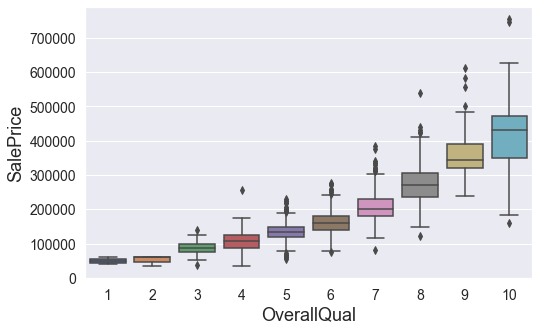

In [96]:
plt.figure(figsize=(8,5))
sns.boxplot(x=house_prices_train['OverallQual'], y=house_prices_train['SalePrice'])



OverallQual outliers looks normal

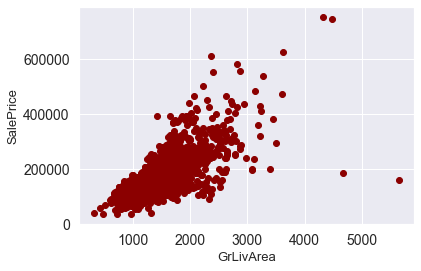

In [97]:
fig, ax = plt.subplots()
ax.scatter(x =house_prices_train['GrLivArea'], y = house_prices_train['SalePrice'],c='darkred')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see here that some data in GrLivArea are bigger than the rest, but they have lower SalePrice. That is unsual behavior and we need to drop them

In [98]:
#Deleting outliers from GrLivArea
house_prices_train = house_prices_train.drop(house_prices_train[(house_prices_train['GrLivArea']>4000) & (house_prices_train['SalePrice']<300000)].index).reset_index(drop=True)


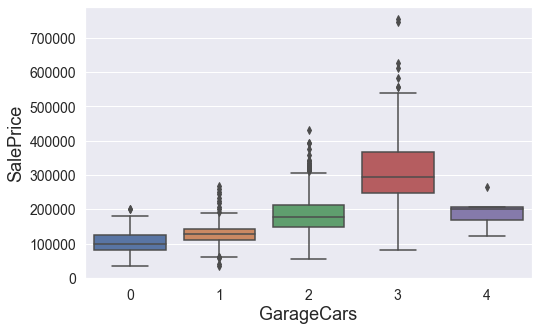

In [99]:
plt.figure(figsize=(8,5))
sns.boxplot(x=house_prices_train['GarageCars'], y=house_prices_train['SalePrice']);



After observation the data in GarageCars, we notice unsual behavior on category 4.

Note: deleting this category has caused the RMSE to rise than before,so we decided to keep it


_________________________________

To get the most possible minimum RMSE score we leave the rest of the outliers as they are,because from practicing we found dropping any more outliers can cause the RMSE to rise

### 3.3 Testing Dataframe

In [100]:
#call the function replace_none to replace Nan categorical to more appropiate value
replace_none(list_column,house_prices_test)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,144,0,None,None,None,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


 From observation we can see that most of the garages are built in the same years of the houses

so we will replace the nan values in the garage year built to the value of the house year built in the same row

In [101]:
#replace each nan values in garage year with the year of the building in the same row

house_prices_test['GarageYrBlt'] = house_prices_test.apply(
lambda row: row['YearBuilt'] if np.isnan(row['GarageYrBlt']) else row['GarageYrBlt'],axis=1)

In [102]:
# change 'None' category string to more meaningful string
house_prices_test['MasVnrType'].replace('None','no masonry vnr',inplace=True)


##### Line of code to help get the column index for both train and test dataframe
column_index=np.argmax(np.array(DataframeName.columns=='columnName'))


In [103]:
#numerical columns index to replace each missing data with mode/most_frequent


column_index=[2,3,9,23,24,25,26,34,36,37,38,47,48,53,55,60,61,62,77,78]

from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imr = imr.fit(house_prices_test.iloc[:,column_index])

house_prices_test.iloc[:,column_index] = imr.transform(house_prices_test.iloc[:,column_index])



In [104]:
# check the precentage of the nan values in all columns after cleaning


houses_missing_value_test = house_prices_test.isnull().sum().sort_values(ascending=False)

houses_missing_percent_test = (house_prices_test.isnull().sum()/house_prices_test.isnull().count()).sort_values(ascending=False)

missing_T = pd.concat([houses_missing_value_test, houses_missing_percent_test], axis=1, keys=['Value', 'Percent'])

missing_T.head(10)

,Value,Percent
SaleCondition,0,0.0
SaleType,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


In [105]:
#drop ID column, because we can't use it on models
house_prices_test.drop("Id", axis = 1, inplace = True)

There are some columns are regonized as numerical columns, but after  observing them, we noticed these columns should be categorical rather than numerical, so we will change them



In [106]:

house_prices_test['MSSubClass'] = house_prices_train['MSSubClass'].apply(str)

house_prices_test['YrSold'] = house_prices_train['YrSold'].astype(str)

house_prices_test['MoSold'] = house_prices_train['MoSold'].astype(str)

There are some columns are regonized as numerical columns, but after  observing them, we noticed these columns should be categorical rather than numerical, so we will change them




In [107]:

house_prices_test['MSSubClass'] = house_prices_test['MSSubClass'].apply(str)

house_prices_test['YrSold'] = house_prices_test['YrSold'].astype(str)

house_prices_test['MoSold'] = house_prices_test['MoSold'].astype(str)

# 4. Dummies

convert categorical variables to "one-hot encoded" using .get_dummies

In [108]:
house_prices_train=pd.get_dummies(house_prices_train, columns=['MSSubClass','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','YrSold','MoSold'], drop_first=True)



In [109]:
house_prices_test=pd.get_dummies(house_prices_test, columns=['MSSubClass','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','YrSold','MoSold'], drop_first=True)




## 4.1 find categorial features

Compare the categoricals between the train and test dataframes. If we find a categorical column in one dataframe but not in the other, we will add the missing column with value of zero

In [110]:

# Get missing columns in the training test
missing_cols = set( house_prices_train.columns ) - set( house_prices_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    house_prices_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
house_prices_test = house_prices_test[house_prices_train.columns]

In [111]:
#drop the salePrice from test dataframe
house_prices_test.drop(['SalePrice'],inplace=True,axis=1)
test_X_=house_prices_test

In [112]:
# select the features as X
X=house_prices_train.drop(["SalePrice"],axis=1).copy()

#select the target as y
y=house_prices_train["SalePrice"].copy()


X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=2) 



# 5. Feature selection

In [113]:
#get the correlation for training 
cor_train_corr=house_prices_train.corr()


In [114]:

#we put threshold to determine which features should be selected 

#select strong positive using threshold more than 0.4
threshold_P=0.4
high_positive_corre=cor_train_corr['SalePrice']

#compare correlation with threshold
positives=(high_positive_corre[high_positive_corre>threshold_P])
positive_corre=pd.DataFrame(positives)
positive_corre.columns=positive_corre.columns.rename("positives")


#select strong negative using threshold less than 0.4
threshold_N=-0.4
high_negative_corre=cor_train_corr['SalePrice']

#compare correlation with threshold
negatives=high_negative_corre[high_negative_corre<threshold_N]
negative_corre=pd.DataFrame(negatives)
negative_corre.columns=negative_corre.columns.rename("negative")


In [115]:
positive_corre.sort_values(by='SalePrice',ascending=False)

positives,SalePrice
SalePrice,1.000000
OverallQual,0.795774
GrLivArea,0.734968
TotalBsmtSF,0.651153
GarageCars,0.641047
1stFlrSF,0.631530
GarageArea,0.629217
FullBath,0.562165
TotRmsAbvGrd,0.537769
YearBuilt,0.523608


In [116]:
 negative_corre.sort_values(by='SalePrice',ascending=False)

negative,SalePrice
GarageFinish_Unf,-0.410942
BsmtQual_TA,-0.452785
FireplaceQu_None,-0.472350
KitchenQual_TA,-0.519821
ExterQual_TA,-0.589909


In [117]:
feature_select=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','Foundation_PConc',
'ExterQual_Gd','BsmtFinType1_GLQ','Neighborhood_NridgHt','SaleType_New','SaleCondition_Partial','FireplaceQu_Gd',
'GarageType_Attchd','MasVnrType_Stone','Neighborhood_NoRidge','KitchenQual_Gd','Exterior2nd_VinylSd',
'Exterior1st_VinylSd','BsmtExposure_Gd','ExterQual_TA','KitchenQual_TA','BsmtQual_TA','GarageFinish_Unf']


In [251]:
X_FS=house_prices_train[feature_select]
    
y_FS=house_prices_train["SalePrice"]

X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(
  X_FS, y_FS, test_size=0.20, random_state=2) 


test_X_FS=house_prices_test[feature_select]


# 6. Machine Learning

For the model, we will try both models with standard scalar and without it to see the differences in performance

## 6.1 Lasso

### 6.1.1 With Scalar Features

In [145]:
standard_scalar = StandardScaler()

#standarlize X train
X_train_ss = standard_scalar.fit_transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X.columns)

# #standarlize X test
X_test_ss = standard_scalar.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X.columns)

#standarlize the X to get the prediction  it
test_X_ss = standard_scalar.transform(test_X_)
test_X_ss = pd.DataFrame(X_test_ss, columns=X.columns)


In [65]:
range_lasso=np.arange(0.01,100,0.01)


model_lasso = LassoCV(alphas =range_lasso)

#train the lasso model
model_lasso.fit(X_train_ss,y_train)

# get the train score
model_lasso.score(X_train_ss,y_train)

0.9464554121606668

In [119]:
model_lasso.score(X_test_ss,y_test)

0.8439816580584233

In [168]:
Basline_lasso=1. - y_test.mean()
print('Baseline score for the y_test in training dataframe:',Basline_lasso)

Baseline score for the y_test in training dataframe: -183838.24315068492


In [67]:
# Perform 2-fold cross validation on lasso model
scores = cross_val_score(model_lasso,X_train_ss,y_train, cv=5)
print("Cross-validated training scores for lassoCV model:", scores.mean())


Cross-validated training scores for lasso model: 0.8887420496420685


In [120]:
#get the prediction of X from the test dataframe 
pred_lasso=model_lasso.predict(test_X_)
pred_lasso

array([1.59177139e+08, 2.00866312e+08, 2.04539292e+08, ...,
       2.46600929e+08, 1.49864778e+08, 1.82988780e+08])

In [121]:
#save the prediction to submit and get the score of RMSE

y_dataframe=pd.DataFrame(pred_lasso,columns=['SalePrice_pred_lasso'])

dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_lasso.csv',index=False)


The Score of RMSE for LassoCV model is: 6.90683

## 6.2 Ridge

### 6.2.1 Without Scalar Features

In [122]:
from sklearn.linear_model import RidgeCV,LassoCV

range_Ridge=np.arange(0.01,100,0.01)
ridgecv = RidgeCV(alphas=range_Ridge)
# train ridgecv
ridgecv.fit(X_train, y_train)

#get the best alpha
print('The best Alpha:',ridgecv.alpha_)

The best Alpha: 9.57


In [123]:
#get the train score
ridgecv.score(X_train, y_train)

0.9381640092145025

In [124]:
#get the test score
ridgecv.score(X_test, y_test)

0.8773989837473453

In [129]:
#get the predict of the test dataframe
pred_Ridge=ridgecv.predict(test_X_)
pred_Ridge

array([100677.70137632, 160520.54443517, 185933.83552842, ...,
       174839.03441678, 105568.15714239, 222746.64672449])

In [176]:
Basline_ridge=1 - pred_Ridge.mean()
print('Baseline score for the test data dataframe:',Basline_ridge)

Baseline score for the test data dataframe: -173972.93795120786


In [130]:

# Perform 2-fold cross validation on RidgeCV model
scores = cross_val_score(ridgecv,X_train,y_train, cv=5)
print("Cross-validated training scores for RidgeCV model:", scores.mean())


Cross-validated training scores for RidgeCV model: 0.8959978032556724


In [132]:
#save the prediction to submit and get the score of RMSE

y_dataframe=pd.DataFrame(pred_Ridge,columns=['SalePrice_pred_ridge'])

dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_ridge.csv',index=False)



<b><I>The score of RMSE for RidgeCV model: 0.42697</b></I>

### 6.2.2 With Scalar Features

In [159]:
range_Ridge=np.arange(0.01,100,0.01)
ridgecv_s = RidgeCV(alphas=range_Ridge)

ridgecv_s.fit(X_train_ss, y_train)

#get the best alpha
print('The best Alpha:',ridgecv_s.alpha_)

The best Alpha: 81.98


In [160]:
ridgecv_s.score(X_train_ss, y_train)

0.9440630474889418

In [161]:
ridgecv_s.score(X_test_ss,y_test)

0.8415430922684615

In [162]:
pred_Ridge_s=ridgecv_s.predict(test_X_)
pred_Ridge_s

array([1.28849388e+08, 1.64931876e+08, 1.63082451e+08, ...,
       2.01362770e+08, 1.19699877e+08, 1.44401349e+08])

In [ ]:

# Perform 2-fold cross validation on lasso model
scores = cross_val_score(ridgecv_s,X_train_ss,y_train, cv=5)
print("Cross-validated training scores for RidgeCV model:", scores.mean())



In [163]:
#save the prediction to submit and get the score of RMSE

y_dataframe=pd.DataFrame(pred_Ridge_s,columns=['SalePrice_pred_ridge_s'])

dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_ridge_s.csv',index=False)



<b><I>The score of RMSE for RidgeCV model with standarize is: 6.64239</b></I>

## 6.3 Bagging Regressor


### 6.3.1 Without Scalar Features

In [186]:
param_reg = { 'max_features': [0.3,.4,.5, 0.6,.7,.8, 1],
        'n_estimators': [50,100, 150, 200], 
         'base_estimator__max_depth': [3, 5,10,15, 20]}

In [187]:
from sklearn.tree import DecisionTreeRegressor

model_reg=BaggingRegressor(base_estimator=DecisionTreeRegressor(),)

model_GSsearch = GridSearchCV(model_reg,param_reg, cv=9)
model_GSsearch.fit(X_train, y_train)


GridSearchCV(cv=9, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fr

In [188]:
model_GSsearch.best_params_

{'base_estimator__max_depth': 15, 'max_features': 0.7, 'n_estimators': 200}

In [189]:
model_GSsearch.score(X_train, y_train)

0.9868052231593564

In [190]:
model_GSsearch.score(X_test, y_test)


0.8745470001649507

In [191]:
pred_bagging=model_GSsearch.predict(test_X_)
pred_bagging

array([125910.77452838, 153502.6457266 , 177773.36529468, ...,
       153055.91748111, 112985.17556859, 230931.23309057])

In [ ]:
scores_bagg = cross_val_score(model_GSsearch,X_train, y_train, cv=6)
print("Mean of Cross-validated scores:",scores_bagg.mean())



In [192]:
#save the prediction to submit and get the score of RMSE

y_dataframe=pd.DataFrame(pred_bagging,columns=['SalePrice_pred_bagging'])

dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_bagging.csv',index=False)


<b><I>The score of the Bagging Model is: 0.14994</b></I>

### 6.3.2 With Scalar Features

In [53]:

model_reg_s=BaggingRegressor(base_estimator=DecisionTreeRegressor(),)

model_GSsearch_s = GridSearchCV(model_reg_s,param_reg, cv=9)
model_GSsearch_s.fit(X_train_ss, y_train)

GridSearchCV(cv=9, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fr

In [54]:
model_GSsearch_s.best_params_

{'base_estimator__max_depth': 20, 'max_features': 0.5, 'n_estimators': 50}

In [55]:
model_GSsearch_s.score(X_train_ss, y_train)

0.9796471968108375

In [ ]:
model_GSsearch_s.score(X_test_ss, y_test)


In [96]:
pred_bagging_s=model_GSsearch_s.predict(test_X_ss)
pred_bagging_s

array([206009.16666667, 173919.2       , 219772.91666667, ...,
       259107.58      , 136165.49848485, 145495.30769231])

In [ ]:
scores_bagg = cross_val_score(model_GSsearch_s,X_train_ss, y_train, cv=6)
print("Mean of Cross-validated scores:",scores_bagg.mean())


In [97]:
#save the prediction to submit and get the score of RMSE

y_dataframe=pd.DataFrame(pred_bagging_s,columns=['SalePrice_pred_bagging_s'])
y_dataframe = y_dataframe[:-1]
dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_bagging_s.csv',index=False)


<b><I>The score of Bagging Regressor with standarize is: 0.558</b></I>

## 6.4 Random forest

### 6.4.1 Without Scalar Features

In [164]:
param_Rforest = { 'max_depth': [ 2, 3, 4, 5, 6,9,13,15,20],
          'max_features':[.1,.2,.3,.4,.6,.7,.8,.9,1],
          'n_estimators': [20,50,130,150],
          'min_samples_leaf': [1, 2, 3, 4]
          }

In [60]:
model_Rforest = RandomForestRegressor(random_state=1)
Rforest_GSsearch = GridSearchCV(model_Rforest ,param_Rforest, cv=6, verbose=1, n_jobs=-1 )

Rforest_GSsearch.fit(X_train, y_train)

train_score_RF=Rforest_GSsearch.score(X_train, y_train)

test_score_RF=Rforest_GSsearch.score(X_test, y_test)
 

print("train score for Random Forest model:",train_score_RF)
print("test score for Random Forest model:",test_score_RF)


Fitting 6 folds for each of 1296 candidates, totalling 7776 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 7776 out of 7776 | elapsed: 25.3min finished


train score: 0.980853059687226


In [67]:
y_pred_forest=Rforest_GSsearch.predict(test_X_)
y_pred_forest


array([128654.92940623, 152189.27572318, 179451.78960784, ...,
       160232.95520527, 113357.33087782, 226210.6425044 ])

In [69]:

y_dataframe=pd.DataFrame(y_pred_forest,columns=['SalePrice_pred'])

dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_forest.csv',index=False)


dtype('float64')

<b><I>The RMSE score for Random forest model is: 0.148</b></I>

### 6.4.2 With Scalar Features

In [165]:
model_Rforest_s = RandomForestRegressor(random_state=1)

Rforest_GSsearch_s = GridSearchCV(model_Rforest_s ,param_Rforest, cv=6, n_jobs=-1 )

Rforest_GSsearch_s.fit(X_train_ss, y_train)

train_score_s=Rforest_GSsearch_s.score(X_train_ss, y_train)

test_score_s=Rforest_GSsearch_s.score(X_test_ss, y_test)
 

print("train score for Random Forest Scaled :",train_score_s)
print("test score  score for Random Forest Scaled :",test_score_s)


train score for Random Forest Scaled : 0.9852641265036363
test score  score for Random Forest Scaled : 0.8862022623939064


In [202]:
y_pred_forest_s=Rforest_GSsearch_s.predict(test_X_)
y_pred_forest_s


array([480946.83333333, 472432.81333333, 549365.3       , ...,
       464404.74      , 397240.74      , 550157.77333333])

In [203]:

y_dataframe=pd.DataFrame(y_pred_forest_s,columns=['SalePrice_pred_forest'])
dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_forest_scale.csv',index=False)


<b><I>The RMSE score for Random forest model with standarize is: 1.15475</b></I>

## 6.5 Decision Tree Regressor

### 6.5.1 Without Scalar Features

In [183]:
param_DTress = { 'max_depth': [1, 2, 3, 4, 5, 6,9,13,15],
          'max_features':[.1,.2,.3,.4,.6,.7,.8],
          'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
          'min_samples_leaf': [1, 2, 3, 4]
          }

In [184]:

model_DTree = DecisionTreeRegressor( random_state=1)

DTress_GSsearch = GridSearchCV(model_DTree,param_DTress, cv=6, n_jobs=-1 )

DTress_GSsearch.fit(X_train, y_train)

train_scores=DTress_GSsearch.score(X_train, y_train)


test_scores=DTress_GSsearch.score(X_test, y_test)

print('Train score for Decision Tree without standarize: ',train_scores)

print('Test score for Decision Tree without standarize: ',test_scores)


Train score for Decision Tree without standarize:  0.7796399130847582
Test score for Decision Tree without standarize:  0.6095107449696324


In [ ]:
scores_DTress = cross_val_score(DTress_GSsearch,X_test, y_test, cv=5)
print("cross validation:",scores_DTress.mean())


In [185]:
y_pred_tres=DTress_GSsearch.predict(test_X_)
y_pred_tres

array([122075.09547739, 122075.09547739, 183943.66359447, ...,
       151736.44347826, 183943.66359447, 237906.30379747])

In [27]:
y_dataframe=pd.DataFrame(y_pred_tres,columns=['SalePrice_pred'])

dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_DT.csv',index=False)


<b><I>The Score of RMSE for Decision Tree Regressor model is: 0.25538</b></I>

### 6.5.2 With Scalar Features

In [147]:

model_DTree_s = DecisionTreeRegressor( random_state=1)

DTress_GSsearch_s = GridSearchCV(model_DTree_s,param_DTress, cv=6, n_jobs=-1 )

DTress_GSsearch_s.fit(X_train_ss, y_train)

#get the train score
train_scores_DT=DTress_GSsearch_s.score(X_train_ss, y_train)

#get the test score
test_scores_DT=DTress_GSsearch_s.score(X_test_ss, y_test)

print('Train score for Decision Tree with standarize: ',train_scores_DT)

print('Test score for Decision Tree with standarize: ',test_scores_DT)



Train score for Decision Tree with standarize:  0.7796399130847582
Test score for Decision Tree with standarize:  0.6095107449696324


In [ ]:
#cross validation for training the data
scores_DTress = cross_val_score(DTress_GSsearch,X_train_ss, y_train, cv=5)
print("cross validation for training Decision Tree:",scores_DTress.mean())


In [199]:
#predict the test X 
y_pred_tres_s=DTress_GSsearch_s.predict(test_X_)
y_pred_tres_s

array([633316.2       , 408315.72222222, 633316.2       , ...,
       408315.72222222, 408315.72222222, 408315.72222222])

In [200]:
#add the prediction to submission file

y_dataframe=pd.DataFrame(y_pred_tres_s,columns=['SalePrice_pred'])
dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_DT_S.csv',index=False)


<b><I>The score of Decision Tree model with standarize is: 1.07622</b></I>

### calculate the average of more than one model prediction

In [249]:
models_avg = (pred_Ridge+pred_bagging) / 2
models_avg

array([113294.23795235, 157011.59508089, 181853.60041155, ...,
       163947.47594895, 109276.66635549, 226838.93990753])

In [238]:
y_dataframe=pd.DataFrame(models_avg,columns=['average_pred'])
dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_average.csv',index=False)



<b><I>The average score of the two models: Ridge and Bagging:0.13164</b></I>

_______________________________

In [263]:
models_avg_2 = (pred_Ridge+y_pred_tres) / 2

y_dataframe=pd.DataFrame(models_avg_2,columns=['average_pred'])
dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_average_2.csv',index=False)




<b><I>The average score of the two models: Ridge and Decision Tree:0.14914</b></I>

## 6.6 Models with Feature Selection

### Random Forest

In [267]:
param_Rforest_fs = { 'max_depth': [ 2, 3, 4, 5, 6,9,13,15,20],
          'max_features':[.1,.2,.3,.4,.6,.7,.8,.9,1],
          'n_estimators': [20,50,130,150],
          'min_samples_leaf': [1, 2, 3, 4]
          }

In [268]:
model_Rforest_selection = RandomForestRegressor(random_state=2)

Rforest_GSsearch_selection = GridSearchCV(model_Rforest_selection ,
param_Rforest_fs,cv=6, n_jobs=-1 )

Rforest_GSsearch_selection.fit(X_train_FS, y_train_FS)

train_score_RF_selection=Rforest_GSsearch_selection.score(X_train_FS, y_train_FS)

test_score_RF_selection=Rforest_GSsearch_selection.score(X_test_FS, y_test_FS)
 
print("train score for Random Forest model with selection features:",
      train_score_RF_selection)
print("test score for Random Forest model  with selection features:",
      test_score_RF_selection)



train score for Random Forest model with selection features: 0.9818641933247908
test score for Random Forest model  with selection features: 0.8873057290925632


In [271]:
y_pred_forest_FS=Rforest_GSsearch_selection.predict(test_X_FS)

y_dataframe=pd.DataFrame(y_pred_forest_FS,columns=['RandomF_pred'])
dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_RForesr_FS.csv',index=False)


<b><I>The RMSE score with Feature Selection: 0.15814</b></I>

### Baggin regressor with Feature Selection

In [273]:
param_reg_fs = { 'max_features': [0.3,.4,.5, 0.6,.7,.8, 1],
        'n_estimators': [50,100, 150, 200], 
         'base_estimator__max_depth': [3, 5,10,15, 20]}

In [274]:
model_reg_fs=BaggingRegressor(base_estimator=DecisionTreeRegressor(),)

model_GSsearch_fs = GridSearchCV(model_reg_fs,param_reg_fs, cv=9)
model_GSsearch_fs.fit(X_train_FS, y_train_FS)

train_score_reg_selection=model_GSsearch_fs.score(X_train_FS, y_train_FS)

test_score_reg_selection=model_GSsearch_fs.score(X_test_FS, y_test_FS)
 
print("train score for Bagging model with selection features:",
      train_score_reg_selection)
print("test score for Bagging model  with selection features:",
      test_score_reg_selection)



train score for Bagging model with selection features: 0.9843483742870439
test score for Bagging model  with selection features: 0.8838623064051954


In [277]:
pred_bagging_fs=model_GSsearch_fs.predict(test_X_FS)



y_dataframe=pd.DataFrame(pred_bagging_fs,columns=['RandomF_pred'])
dataset=pd.concat([sampl_sub['Id'],y_dataframe],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission_bagg_FS.csv',index=False)



<b><I>The RMSE score with Feature Selection: 0.15689</b></I>

# The Final Result

After testing five models:<b> LassCV,RidgeCV,Bagging Regressor,Random Forest Regressor, and Decision Tree</b>, with both Standarization and feature selection.Using metrics:<b> score,RMSE and cross validation</b>.<br> 

The first best RMSE score is form the average of two models<b> Ridge and Bagging regressor</b> with a score<b> 0.131</b>. The secound best model give us RMSE score with<b> 0.148 </b>is the Random Forest Tree, without using standarization or a feature selection. 

Both models have more ability to react and make a good prediction to new data it will get. In a simple word these models can generalize a new data

#### The Average score of Ridge and Bagging Regressor <br>                
<img src="averg scaore.png"
     title="The Random Forest score"
     alt="The Average score of Ridge and Bagging Regressor"
     style="float: left; margin-right: 10px;" />
 

####     The Random Forest score <br>
<img 
     src="forest score.png"
     alt="The Random Forest score"
     style="float: left; margin-right: 10px;" />



____________________________________________

# Conclusion and recommendations

By studying the effects of features on the houses sales prices, We investigated, cleaned and visualized 80 features in both training and testing datasets. 
After that we used the dummies to convert categorical variables into indicator 0 or 1. 
Then we used Correlation for feature selection to find the strong positive and also the strong negative features ,and tried to use them with models in order to give us the best RMSE score. 
The Best RMSE score we got was 0.131 came from the average of two models ;Ridge and Bagging regressor models, by training all the features without scaling.
This research will help both the sellers and the buyers to ensure they know the correct house price through the prediction in more intelligent way.
Based on the conclusion we recommend:
- Modeling the data on more advanced models to get the possible minimum RMSE score
- Nowadays, a lot of houses are designed with more intelligent security, so it will be interesting to collect this kind of new feature to the other features we already have